In [49]:
import joblib
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
from google.colab import files
uploaded = files.upload()

Saving mymodel.pkl to mymodel.pkl


In [50]:
import joblib

loaded_model = joblib.load('mymodel.pkl')
print("Model loaded successfully!")


Model loaded successfully!


In [51]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles

def generate_dataset_prod(sample=300, random_state=60):
    X, y = make_circles(n_samples=sample,noise=0.1, random_state=random_state)
    df1 = pd.DataFrame(X)
    df1['y'] = y

    X1, y1 = make_moons(n_samples=sample, noise=0.1, random_state=random_state)
    df2 = pd.DataFrame(X1)
    df2['y'] = y

    df = pd.concat([df1, df2])
    df = df.sample(frac=1).reset_index(drop=True)
    return df[[0,1]].to_numpy(), df.y

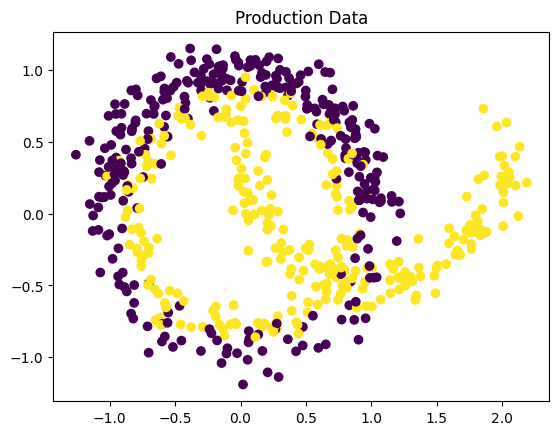

In [52]:
X_prod, y_prod = generate_dataset_prod()

plt.scatter(X_prod[:, 0], X_prod[:, 1], c=y_prod)
plt.title("Production Data")
plt.show()


In [53]:
y_pred_prod = loaded_model.predict(X_prod)

print("Accuracy on Production Data:", accuracy_score(y_prod, y_pred_prod))
print("Classification Report:\n", classification_report(y_prod, y_pred_prod))

Accuracy on Production Data: 0.845
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85       300
           1       0.85      0.84      0.84       300

    accuracy                           0.84       600
   macro avg       0.85      0.84      0.84       600
weighted avg       0.85      0.84      0.84       600

